# Introduction to Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# üîπ One-Hot Encoding (OHE)

## üìñ What is One-Hot Encoding?
One-Hot Encoding is a technique used to **convert categorical variables into numerical representations**, making them suitable for machine learning models. It ensures that categorical data can be effectively used without introducing ordinal relationships.

---

## üõ† How It Works:
- Each **unique category** in a column is represented as a **binary vector**.
- A separate **binary column** is created for each category.
- The presence of a category is marked as `1`, while all others remain `0`.

---

## üî• Example:
Suppose we have a categorical column **"Color"** with values:  
`Red`, `Blue`, `Green`.

One-Hot Encoding will transform it as:

| Color  | Red | Blue | Green |
|--------|-----|------|-------|
| Red    |  1  |  0   |  0    |
| Blue   |  0  |  1   |  0    |
| Green  |  0  |  0   |  1    |

---

## ‚úÖ When to Use:
‚úî When categorical data is **nominal (unordered categories)**.  
‚úî When models **cannot directly process categorical features**.  
‚úî To **prevent numerical misinterpretation** of categorical values.

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [ ]:
df=sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
categorical_cols=['sex' , 'class' , 'alive' , 'embarked'] # all the categorical colums in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.dropna(subset=categorical_cols)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[889 rows x 15 columns]

In [ ]:
encoder=OneHotEncoder(sparse_output=False )
encoded_data=encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_data
# the data has been encoded to  0 and 1s

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


DataFrame after One-Hot Encoding:
   survived  pclass   age  sibsp  parch     fare    who  adult_male deck  \
0         0       3  22.0      1      0   7.2500    man        True  NaN   
1         1       1  38.0      1      0  71.2833  woman       False    C   
2         1       3  26.0      0      0   7.9250  woman       False  NaN   
3         1       1  35.0      1      0  53.1000  woman       False    C   
4         0       3  35.0      0      0   8.0500    man        True  NaN   

   embark_town  ...  sex_male  class_First  class_Second  class_Third  \
0  Southampton  ...       1.0          0.0           0.0          1.0   
1    Cherbourg  ...       0.0          1.0           0.0          0.0   
2  Southampton  ...       0.0          0.0           0.0          1.0   
3  Southampton  ...       0.0          1.0           0.0          0.0   
4  Southampton  ...       1.0          0.0           0.0          1.0   

   alive_no  alive_yes  embarked_C  embarked_Q  embarked_S  embarked_

# One-Hot Encoding in the Titanic Dataset
##  Transformed Columns:
| Embarked | embarked_C | embarked_Q | embarked_S |
|----------|-----------|-----------|-----------|
| C        | 1         | 0         | 0         |
| Q        | 0         | 1         | 0         |
| S        | 0         | 0         | 1         |
| C        | 1         | 0         | 0         |

- **embarked_C** ‚Üí 1 if the passenger embarked from **Cherbourg**, otherwise 0.  
- **embarked_Q** ‚Üí 1 if the passenger embarked from **Queenstown**, otherwise 0.  
- **embarked_S** ‚Üí 1 if the passenger embarked from **Southampton**, otherwise 0.  

If **embarked_Q** and **embarked_S** are both `0`, it means the passenger embarked from **Cherbourg ('C')**, since this category was **dropped during encoding (to avoid redundancy).**  

---


In [ ]:
df_encoded.info()
# as we can see after the encoding the data columns have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   age           714 non-null    float64 
 3   sibsp         891 non-null    int64   
 4   parch         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   who           891 non-null    object  
 7   adult_male    891 non-null    bool    
 8   deck          203 non-null    category
 9   embark_town   889 non-null    object  
 10  alone         891 non-null    bool    
 11  sex_female    891 non-null    float64 
 12  sex_male      891 non-null    float64 
 13  class_First   891 non-null    float64 
 14  class_Second  891 non-null    float64 
 15  class_Third   891 non-null    float64 
 16  alive_no      891 non-null    float64 
 17  alive_yes     891 non-null    float64 
 18  embarked_C

# üîπ Feature Scaling

## üìñ What is Feature Scaling?
Feature scaling is a technique used to **normalize or standardize numerical data** so that all features have a comparable scale.  
This prevents features with larger ranges from dominating those with smaller ranges, ensuring better model performance.

---

## ‚ö° Techniques of Feature Scaling

### 1Ô∏è‚É£ Min-Max Scaling  
Scales values to a fixed range **[0,1]** or **[-1,1]**

‚úÖ Best for **bounded datasets** where minimum and maximum values are known.

---

### 2Ô∏è‚É£ Z-Score Normalization (Standardization)  
Transforms data to have **mean = 0** and **standard deviation = 1**

‚úÖ Used when data follows a **normal (Gaussian) distribution**.

---

### 3Ô∏è‚É£ Decimal Scaling  
Scales values by dividing by a power of **10**:

Where \( j \) is the smallest integer making all values **‚â§1**.

---

### 4Ô∏è‚É£ Log Transformation  
Applies logarithm to **reduce skewness and the effect of outliers**:

‚úÖ Useful for **right-skewed data** with extreme values.

---

## üöÄ Why Normalize Data?
- **Faster convergence** in machine learning models.  
- **Prevents large-scale features from dominating others.**  
- **Improves performance** by ensuring fair comparisons across features.  


# üìè Min-Max Scaling (Normalization)

## üìñ What is Min-Max Scaling?
Min-Max Scaling (also called **Normalization**) rescales data to a fixed range, typically **[0,1]** or **[-1,1]**.  
This ensures that **all features have the same scale**, preventing models from being biased toward larger values.

---

## üìå Formula

![Min-Max Scaling Formula](https://github.com/Steve-Wayne/AI/blob/main/Data%20Preprocessing/minmax_formula.png?raw=1)

Where:
- \( X' \) is the **scaled value**.
- \( X \) is the **original value**.
- \( X_{\min} \) is the **minimum value** in the feature.
- \( X_{\max} \) is the **maximum value** in the feature.

---

## ‚úÖ When to Use Min-Max Scaling?
‚úî When data **does not follow a normal distribution**.  
‚úî When all features should have the **same range** (e.g., neural networks).  
‚úî When **preserving the relationships between data points** is important.  

---

## üõ† Python Implementation:
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = pd.DataFrame({'Feature': [10, 200, 500, 1000, 1500]})

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
data['MinMax_Scaled'] = minmax_scaler.fit_transform(data[['Feature']])

# Display results
print(data)


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
house_data=pd.DataFrame(fetch_california_housing().data , columns=fetch_california_housing().feature_names)
house_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [ ]:
columns = ["MedInc", "HouseAge", "AveRooms"]
data = house_data[columns].copy()
data.head()

MedInc  HouseAge  AveRooms
0  8.3252      41.0  6.984127
1  8.3014      21.0  6.238137
2  7.2574      52.0  8.288136
3  5.6431      52.0  5.817352
4  3.8462      52.0  6.281853

In [ ]:
minmax_scaler = MinMaxScaler(feature_range=(2, 5))#feature range is the [a , b] range
data["MedInc_minmax"] = minmax_scaler.fit_transform(data[["MedInc"]])
data.head()

MedInc  HouseAge  AveRooms  MedInc_minmax
0  8.3252      41.0  6.984127       3.619005
1  8.3014      21.0  6.238137       3.614081
2  7.2574      52.0  8.288136       3.398084
3  5.6431      52.0  5.817352       3.064096
4  3.8462      52.0  6.281853       2.692328

# üìè Z-Score Normalization (Standardization)

## üìñ What is Z-Score Normalization?
Z-Score Normalization (also called **Standardization**) transforms data so that it has:
- **Mean** = 0
- **Standard Deviation** = 1

This technique ensures that **features with different scales** are standardized, making them comparable and improving model performance.

---

## üìå Formula

The transformation is given by:

![Z-Score Formula](https://github.com/Steve-Wayne/AI/blob/main/Data%20Preprocessing/zscore_formula.png?raw=1)

Where:
- \( X' \) is the **scaled value**.
- \( X \) is the **original value**.
- \( \mu \) is the **mean** of the feature.
- \( \sigma \) is the **standard deviation** of the feature.

---

## ‚úÖ When to Use Z-Score Normalization?
‚úî When data follows a **normal (Gaussian) distribution**.  
‚úî When feature values have **different units or scales**.  
‚úî When using **distance-based algorithms** like KNN, SVM, or PCA.  

---

## üõ† Python Implementation:
```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({'Feature': [10, 200, 500, 1000, 1500]})

# Apply Z-Score Normalization
zscore_scaler = StandardScaler()
data['ZScore_Scaled'] = zscore_scaler.fit_transform(data[['Feature']])

# Display results
print(data)


In [ ]:
from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()
data["MedInc_zscore"] = zscore_scaler.fit_transform(data[["MedInc"]])
data.head()

MedInc  HouseAge  AveRooms  MedInc_zscore
0  8.3252      41.0  6.984127       2.344766
1  8.3014      21.0  6.238137       2.332238
2  7.2574      52.0  8.288136       1.782699
3  5.6431      52.0  5.817352       0.932968
4  3.8462      52.0  6.281853      -0.012881

# üî¢ Decimal Scaling

## üìñ What is Decimal Scaling?
Decimal Scaling is a **normalization technique** that transforms data by dividing each value by a power of **10**.  
The goal is to ensure all values fall within a specific range, typically **between -1 and 1**.

It is particularly useful when dealing with **large numerical values** that need to be scaled down while maintaining their relative order.

---

## üìå Formula

The transformation is given by:

![Decimal Scaling Formula](https://github.com/Steve-Wayne/AI/blob/main/Data%20Preprocessing/decimal_scaling.png?raw=1)

Where:
- \( X' \) is the **scaled value**.
- \( X \) is the **original value**.
- \( j \) is the **smallest integer** such that all \( X' \) values fall within **[-1,1]**.

---

## ‚úÖ When to Use Decimal Scaling?
‚úî When feature values have **a very large range**.  
‚úî When data needs to be **compressed while preserving relationships**.  
‚úî When other scaling techniques (like Min-Max or Z-score) are **not suitable due to extreme outliers**.

---

## üõ† Python Implementation:
```python
import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({'Feature': [120, 400, 3500, 12000, 75000]})

# Determine the power of 10 (j)
j = np.ceil(np.log10(data['Feature'].abs().max()))

# Apply Decimal Scaling
data['Decimal_Scaled'] = data['Feature'] / (10**j)

# Display results
print(data)


In [ ]:
max_abs = data["MedInc"].abs().max()
scaling_factor = 10 ** len(str(int(max_abs)))
data["MedInc_decimal"] = data["MedInc"] / scaling_factor
data.head()

MedInc  HouseAge  AveRooms  MedInc_minmax  MedInc_zscore  MedInc_decimal
0  8.3252      41.0  6.984127       3.619005       2.344766        0.083252
1  8.3014      21.0  6.238137       3.614081       2.332238        0.083014
2  7.2574      52.0  8.288136       3.398084       1.782699        0.072574
3  5.6431      52.0  5.817352       3.064096       0.932968        0.056431
4  3.8462      52.0  6.281853       2.692328      -0.012881        0.038462

Text(0.5, 1.0, 'Z-score Standardized')

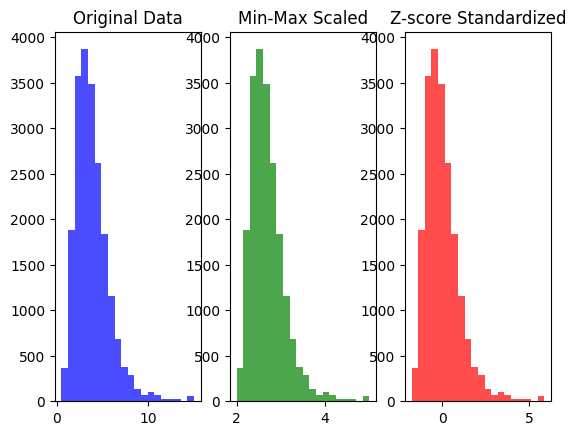

In [ ]:
# Original Distribution
plt.subplot(1, 3, 1)
plt.hist(data["MedInc"], bins=20, color='blue', alpha=0.7)
plt.title("Original Data")

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.hist(data["MedInc_minmax"], bins=20, color='green', alpha=0.7)
plt.title("Min-Max Scaled")

# Z-score Scaled
plt.subplot(1, 3, 3)
plt.hist(data["MedInc_zscore"], bins=20, color='red', alpha=0.7)
plt.title("Z-score Standardized")

## üîπ Log Transformation
### üìñ Formula:
**\[
X_scaled = log(X + 1)
\]**
- **(Adding 1 prevents issues with log(0))**

### ‚úÖ When to Use:
‚úî When data is **highly skewed**.  
‚úî When working with **exponential growth data**, e.g., **financial data, population growth**.  
‚úî When **reducing variance** and **improving normality** in features.

### ‚ö† Considerations:
- Log transformation is **not suitable for negative values**.
- If data contains **zeros**, use **log(X + 1)** to avoid errors.

### üõ† Python Implementation:
```python
import numpy as np

X_log = np.log1p(X)  # log(X + 1) to handle zeros


In [ ]:
random_integers=np.random.randint(15,100,10)
random_integers

array([67, 29, 75, 79, 94, 99, 23, 98, 25, 24])

In [ ]:
log_transformed_data = np.log1p(random_integers)
log_transformed_data

array([4.21950771, 3.40119738, 4.33073334, 4.38202663, 4.55387689,
       4.60517019, 3.17805383, 4.59511985, 3.25809654, 3.21887582])

# üîπ Binning (Discretization) in Data Processing

## üìñ What is Binning?
Binning (also called **discretization**) is a **data preprocessing technique** where continuous numerical values are grouped into **discrete categories (bins)**. This helps in transforming numerical features into categorical features.

---

## üõ† Why Use Binning?
‚úî **Transforms continuous features** into categorical ones for models that work better with categories.  
‚úî **Improves interpretability** by creating meaningful groupings (e.g., age groups: child, adult, senior).  
‚úî **Reduces noise & variance**, making data more stable and less sensitive to small fluctuations.  

---

## üî• Example:
If we have a **"Salary"** column:

| Salary  | Binned Category |
|---------|----------------|
| 10,000  | Low  |
| 35,000  | Medium  |
| 75,000  | High  |

Here, salaries have been grouped into **Low, Medium, and High** categories.

---








Types of Binning

---


**1. Equal-Width Binning**
*   divides the data range into equiwidth intervals
*   Bin_Width= (MAXdata_pt-MINdata_pt)/Number of bins

**2. Equal-Frequency Binning**
*   Divides data into bins containing an equal number of observations.
*   Instead of fixed-width, bin boundaries are set based on quantiles (e.g., quartiles, percentiles).








In [ ]:
#equiwidth
## function to cal binwidth
def equal_width_binning(data, column, num_bins):
    min_val = data[column].min()
    max_val = data[column].max()
    return  (max_val - min_val) / num_bins
bin_width=equal_width_binning(data , 'HouseAge' , 6)
bin_width


8.5

In [ ]:
bin_label=[ 'Very Recent','Recent' , 'Medium' , 'Old' , 'Very Old' , 'Asthetic' ]
data['HouseAge_binned'] = pd.cut(data['HouseAge'], bins=6, labels=bin_label)
data.head()

MedInc  HouseAge  AveRooms  MedInc_minmax  MedInc_zscore  MedInc_decimal  \
0  8.3252      41.0  6.984127       3.619005       2.344766        0.083252   
1  8.3014      21.0  6.238137       3.614081       2.332238        0.083014   
2  7.2574      52.0  8.288136       3.398084       1.782699        0.072574   
3  5.6431      52.0  5.817352       3.064096       0.932968        0.056431   
4  3.8462      52.0  6.281853       2.692328      -0.012881        0.038462   

  HouseAge_binned  
0        Very Old  
1          Medium  
2        Asthetic  
3        Asthetic  
4        Asthetic

In [ ]:
#equidepth bining
data['HouseAge_equidepth'] = pd.qcut(data['HouseAge'], q=6, labels=bin_label)
data.head()
#note that the result of both binnigs is different for 1st row as for equiwidth it is Medium and for equidepth it is Recent

MedInc  HouseAge  AveRooms  MedInc_minmax  MedInc_zscore  MedInc_decimal  \
0  8.3252      41.0  6.984127       3.619005       2.344766        0.083252   
1  8.3014      21.0  6.238137       3.614081       2.332238        0.083014   
2  7.2574      52.0  8.288136       3.398084       1.782699        0.072574   
3  5.6431      52.0  5.817352       3.064096       0.932968        0.056431   
4  3.8462      52.0  6.281853       2.692328      -0.012881        0.038462   

  HouseAge_binned HouseAge_equidepth  
0        Very Old           Very Old  
1          Medium             Recent  
2        Asthetic           Asthetic  
3        Asthetic           Asthetic  
4        Asthetic           Asthetic

# üîπ Dimensionality Reduction

## üìñ What is Dimensionality Reduction?
Dimensionality reduction is the process of **reducing the number of features (or variables) in a dataset** while preserving as much relevant information as possible.  
More features can lead to **noise, redundancy, and reduced model interpretability**, making it harder to extract meaningful patterns.

---

## ‚úÖ Why is Dimensionality Reduction Used?
‚úî **Simplifies models**, making them easier to interpret.  
‚úî **Reduces computation time**, improving efficiency.  
‚úî **Prevents overfitting** by removing redundant and irrelevant features.  

---

## üî• Types of Dimensionality Reduction

### 1Ô∏è‚É£ Feature Selection
Selecting a **subset of the most important features** while discarding irrelevant or redundant ones.

**Methods:**
- **Filter Methods** ‚Üí Based on statistical techniques like correlation.  
- **Wrapper Methods** ‚Üí Iteratively selects the best feature combination (e.g., Recursive Feature Elimination).  
- **Embedded Methods** ‚Üí Uses built-in model techniques (e.g., **Lasso Regression**).  

---

### 2Ô∏è‚É£ Feature Extraction
Transforming high-dimensional data into a **lower-dimensional space** while preserving structure.

**Common Techniques:**
- **Principal Component Analysis (PCA)**  
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
- **Autoencoders (Neural Networks for dimensionality reduction)**  

---








In [ ]:
##Feature selection using Correlation
##lets get the california housing data
house=pd.DataFrame(fetch_california_housing().data , columns=fetch_california_housing().feature_names)
house.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

##Correlation
 it is a measure of how strongly the change in one feature affects other features . A positive correlation coefficient corresponds to a increase while negative in decrease

In [ ]:
house.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000

<Axes: >

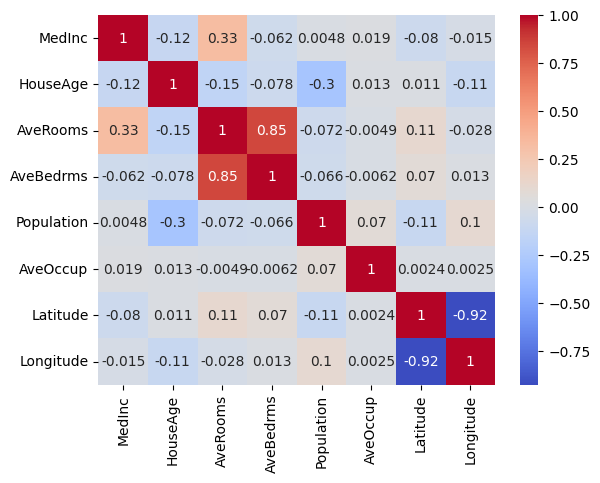

In [ ]:
sns.heatmap(house.corr(),annot=True, cmap='coolwarm')
## a heatmap is a great way to visualize correlation between all features of the data
## as we can see since longitude and lattitude have alsmost zero affect on other variables  so  we can drop them
## also we see avg rooms and avg bedrooms are strongly correlated so we will choose only one of them ie avg rooms


In [ ]:
house.drop(columns=['Latitude' , 'Longitude' , 'AveBedrms'] , axis=1 , inplace=True)

In [ ]:
house.corr()

MedInc  HouseAge  AveRooms  Population  AveOccup
MedInc      1.000000 -0.119034  0.326895    0.004834  0.018766
HouseAge   -0.119034  1.000000 -0.153277   -0.296244  0.013191
AveRooms    0.326895 -0.153277  1.000000   -0.072213 -0.004852
Population  0.004834 -0.296244 -0.072213    1.000000  0.069863
AveOccup    0.018766  0.013191 -0.004852    0.069863  1.000000

<Axes: >

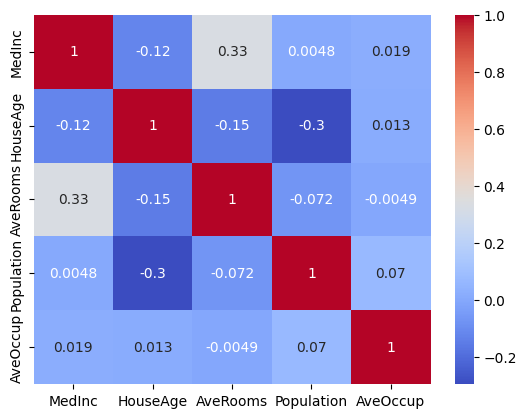

In [ ]:
## ploting the heatmap again
sns.heatmap(house.corr(),annot=True, cmap='coolwarm')
# this way we can select more important features from data and train model on them

# üìå Principal Component Analysis (PCA)

## ‚ú® What is PCA?
**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It helps in:
- Reducing computational complexity.
- Removing redundant features.
- Enhancing data visualization.
- Avoiding the curse of dimensionality.

---

## üî¢ How PCA Works?
1. **Standardization** ‚Äì Normalize the dataset to have zero mean and unit variance.
2. **Covariance Matrix Computation** ‚Äì Measure how features vary together.
3. **Eigenvalue & Eigenvector Calculation** ‚Äì Find the principal components.
4. **Sort & Select Components** ‚Äì Rank components by explained variance and keep the top ones.
5. **Transform Data** ‚Äì Project data onto the new feature space.

---

## üìä PCA in Action
- Each principal component (PC) is a linear combination of the original features.
- PCs are **orthogonal** (uncorrelated).
- The first PC captures the most variance, followed by the second, and so on.

---

## üìà Choosing the Right Number of Components
To decide how many PCs to keep, analyze the **explained variance ratio**:
- A **scree plot** shows the cumulative variance explained by each component.
- Keep enough components to retain **90-95% of the variance**.

---


In [ ]:
from sklearn.decomposition import PCA
data1 = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Apply PCA (keeping enough components to explain ~95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Print variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225 ]


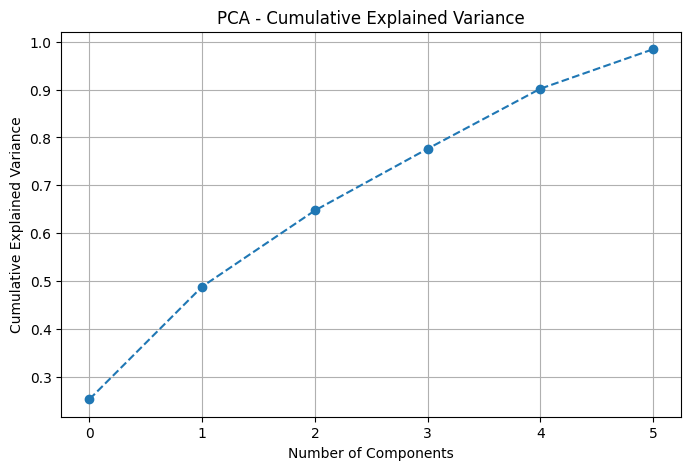

In [ ]:
# Plot cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid()
plt.show()


In [ ]:
print("Original Shape:", X.shape)
print("Transformed Shape:", X_pca.shape)

Original Shape: (20640, 8)
Transformed Shape: (20640, 6)
